In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [2]:
path = f'/home/msc2/DataViz/Assignment2/datasets/Assignment2/'
save_path = f'/home/msc2/DataViz/Assignment2/plots/Assignment2/'

In [58]:
de = pd.read_csv(path+'deaths.csv')
da = pd.read_csv(path+'accidents_2017.csv')

In [59]:
de.rename(columns = {'District.Code': 'District Code','District.Name': 'District Name','Neighborhood.Code': 'Neighborhood Code','Neighborhood.Name': 'Neighborhood Name'}, inplace = True)

In [60]:
de.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,0-4,1
1,2017,1,Ciutat Vella,2,el Barri Gòtic,0-4,1
2,2017,1,Ciutat Vella,3,la Barceloneta,0-4,0
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",0-4,0
4,2017,2,Eixample,5,el Fort Pienc,0-4,0


In [61]:
da.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [62]:
de['Year'].value_counts()

2017    1533
2016    1533
2015    1533
Name: Year, dtype: int64

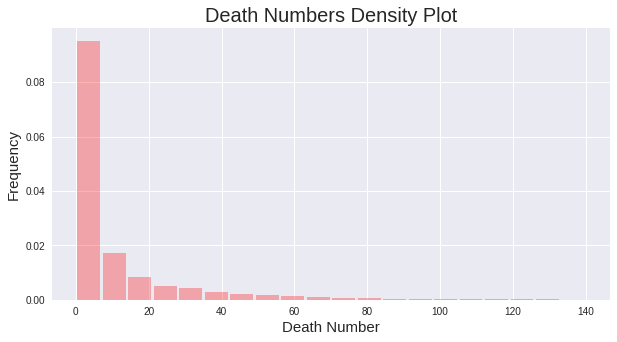

In [63]:
base_p = de['Number']
plt.figure(figsize = (10,5))
plt.hist(base_p, density=True, facecolor='red', alpha=0.3, rwidth = 0.9, bins = 20, range = (min(base_p), 140))
plt.title('Death Numbers Density Plot', fontsize = 20)
plt.xlabel('Death Number')
plt.ylabel('Frequency')
plt.savefig(save_path+'death_number_hist.jpg',dpi = 200)
plt.show()

<h2>Histogram</h2>

In [71]:
table = pd.pivot_table(data = de, index = 'District Name', values = 'Number', columns= 'Year',aggfunc = 'sum')

In [73]:
table1 = pd.pivot_table(data = da, index = 'District Name', values = 'Victims',columns = 'Weekday', aggfunc = 'sum')

In [93]:
hrv = da.loc[:, ['Hour','Victims']]
hrv.head()

,Hour,Victims
0,8,2
1,13,2
2,21,5
3,2,1
4,14,1


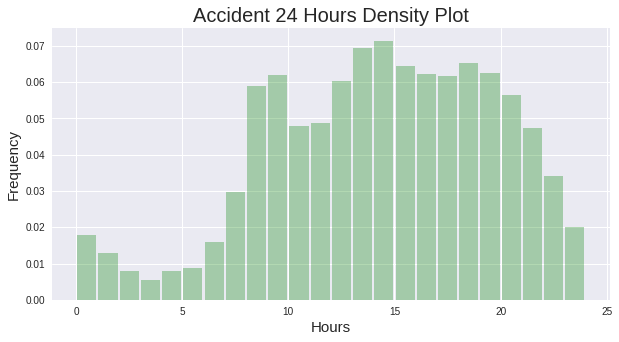

In [112]:
base_p = hrv['Hour']
plt.figure(figsize = (10,5))
plt.hist(base_p, density=True, facecolor='green', alpha=0.3, rwidth = 0.9, bins = 24, range = (min(base_p), 24))
plt.title('Accident 24 Hours Density Plot', fontsize = 20)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.savefig(save_path+'accident_hour_hist.jpg',dpi = 200)
plt.show()

<h3>From here, we can see that the most number of accidents happened in the 14th hour of the day, i.e., afternoon 2pm.<br> - Also that there is lesser accidents in the night to early morning hours of the day due to lesser traffic maybe.<br> - We can also see that the accidents frequency is more in the morning and afternoon hours. </h3>

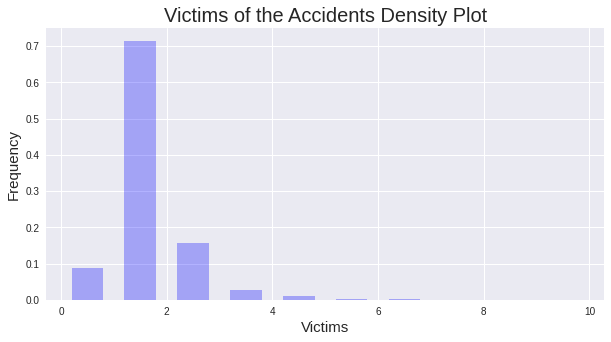

In [113]:
base_p = hrv['Victims']
plt.figure(figsize = (10,5))
plt.hist(base_p, density=True, facecolor='blue', alpha=0.3, rwidth = 0.6, bins = 10, range = (min(base_p), max(base_p)))
plt.title('Victims of the Accidents Density Plot', fontsize = 20)
plt.xlabel('Victims')
plt.ylabel('Frequency')
plt.savefig(save_path+'no_of_victims_hist.jpg',dpi = 200)
plt.show()

<h3> We can see that in 70% of the accidents that happened only 1 victim or 1 person is injured.</h3>

<h1>Barplot</h1>

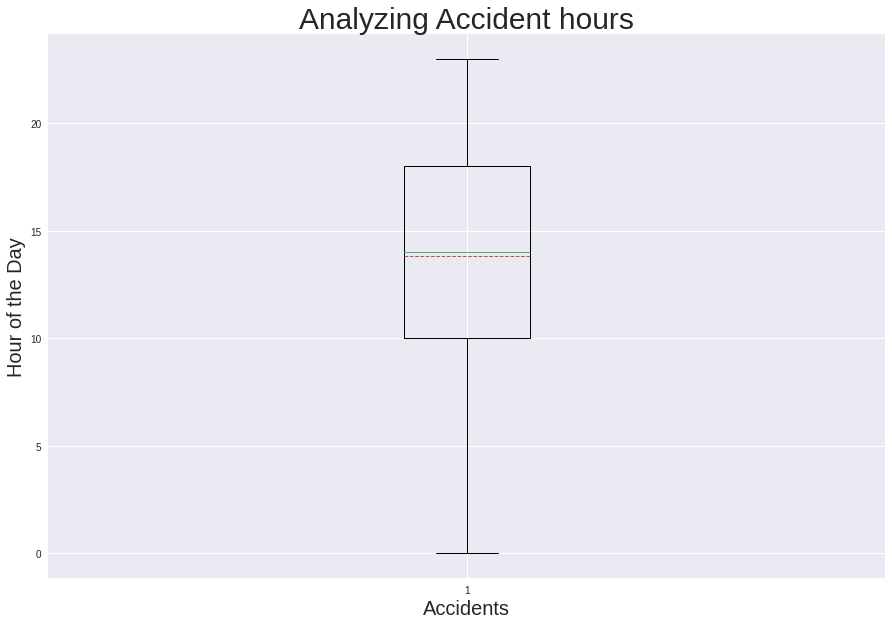

In [136]:
plt.figure(figsize = (15,10))
plt.boxplot(x= hrv['Hour'], showmeans = True, meanline = True, manage_ticks = True)
plt.title('Analyzing Accident hours', fontsize = 30)
plt.xlabel('Accidents', fontsize = 20)
plt.ylabel('Hour of the Day', fontsize = 20)
plt.savefig(save_path+'accident_hours_boxplot.jpg', dpi = 300)
plt.show()

<h3>From here we can see that the average time where most of the accidents happen is 1pm - 2pm</h3> 

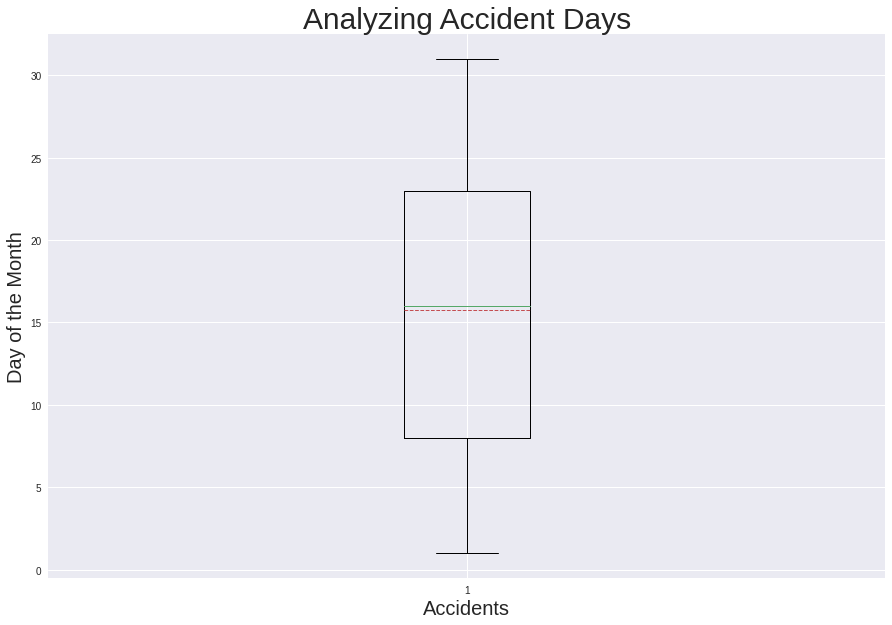

In [138]:
plt.figure(figsize = (15,10))
plt.boxplot(x= da['Day'], showmeans = True, meanline = True, manage_ticks = True)
plt.title('Analyzing Accident Days', fontsize = 30)
plt.xlabel('Accidents', fontsize = 20)
plt.ylabel('Day of the Month', fontsize = 20)
plt.savefig(save_path+'accident_days_boxplot.jpg', dpi = 300)
plt.show()

<h3>Most of the accidents happen in the middle of the month 16th to 17th</h3>